<a href="https://colab.research.google.com/github/VladPlusIn/internship_task/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the datasets
gps_data = pd.read_csv('/content/drive/MyDrive/Data Analyst Internship Tech Test.zip (Unzipped Files)/gps_data.csv')
imu_data = pd.read_csv('/content/drive/MyDrive/Data Analyst Internship Tech Test.zip (Unzipped Files)/imu_data.csv')

# Display the first few rows of each dataset
gps_data.head(), imu_data.head()

(    Serial Number               NZDT   Latitude   Longitude  GPS Heading  \
 0  004-0009-00481  16/10/20 17:27:15 -37.553447  175.459181           11   
 1  004-0009-00481  16/10/20 17:27:14 -37.553455  175.459178            3   
 2  004-0009-00481  16/10/20 17:27:13 -37.553470  175.459177          359   
 3  004-0009-00481  16/10/20 17:27:12 -37.553485  175.459177            6   
 4  004-0009-00481  16/10/20 17:27:10 -37.553496  175.459176            3   
 
    GPS Speed  
 0   0.938258  
 1   1.627387  
 2   1.680147  
 3   0.614859  
 4   1.594698  ,
     Serial Number               NZDT     Heading
 0  004-0009-00481  16/10/20 17:27:15  373.461806
 1  004-0009-00481  16/10/20 17:27:14  364.935411
 2  004-0009-00481  16/10/20 17:27:13  342.940320
 3  004-0009-00481  16/10/20 17:27:12  351.169082
 4  004-0009-00481  16/10/20 17:27:10  345.652691)

In [3]:
# Convert timestamps to datetime for proper merging
gps_data['NZDT'] = pd.to_datetime(gps_data['NZDT'])
imu_data['NZDT'] = pd.to_datetime(imu_data['NZDT'])

# Merge data on Serial Number and Timestamp
merged_data = pd.merge(gps_data, imu_data, on=['Serial Number', 'NZDT'], how='inner')

# Display the merged data
merged_data.head()

<ipython-input-3-c46c1ba71a74>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gps_data['NZDT'] = pd.to_datetime(gps_data['NZDT'])
<ipython-input-3-c46c1ba71a74>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  imu_data['NZDT'] = pd.to_datetime(imu_data['NZDT'])


,Serial Number,NZDT,Latitude,Longitude,GPS Heading,GPS Speed,Heading
0,004-0009-00481,2020-10-16 17:27:15,-37.553447,175.459181,11,0.938258,373.461806
1,004-0009-00481,2020-10-16 17:27:14,-37.553455,175.459178,3,1.627387,364.935411
2,004-0009-00481,2020-10-16 17:27:13,-37.553470,175.459177,359,1.680147,342.940320
3,004-0009-00481,2020-10-16 17:27:12,-37.553485,175.459177,6,0.614859,351.169082
4,004-0009-00481,2020-10-16 17:27:10,-37.553496,175.459176,3,1.594698,345.652691


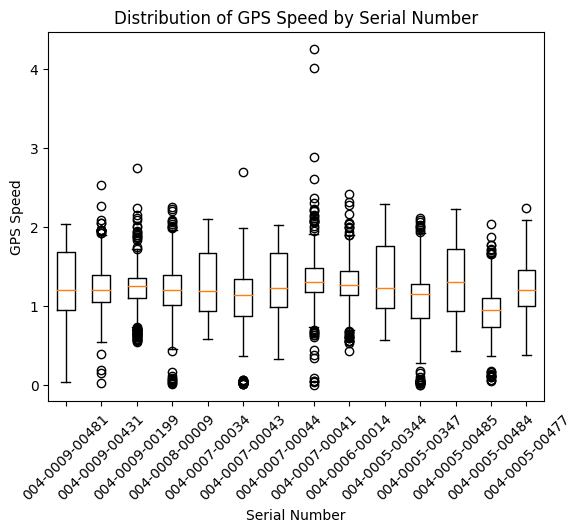

In [4]:
# @title Distribution of GPS Speed by Serial Number

import matplotlib.pyplot as plt

plt.boxplot([merged_data['GPS Speed'][merged_data['Serial Number'] == sn] for sn in merged_data['Serial Number'].unique()], labels=merged_data['Serial Number'].unique())

plt.xlabel('Serial Number')
plt.ylabel('GPS Speed')
plt.title('Distribution of GPS Speed by Serial Number')
_ = plt.xticks(rotation=45)


2. Data Visualization and Analysis
Calculate and Compare Headings

In [5]:
# Calculate the difference between IMU heading and GPS heading
merged_data['Heading Difference'] = merged_data['Heading'] - merged_data['GPS Heading']

# Normalize the heading difference to be within the range [-180, 180]
merged_data['Heading Difference'] = ((merged_data['Heading Difference'] + 180) % 360) - 180

# Summary statistics
heading_summary = merged_data['Heading Difference'].describe()
heading_summary

count    3309.000000
mean        0.630861
std        20.811906
min      -107.293878
25%       -15.749365
50%        -1.301963
75%        17.524708
max       138.019127
Name: Heading Difference, dtype: float64

In [15]:
# Summary statistics for heading differences
heading_summary = merged_data['Heading Difference'].describe()
print("Heading Difference Summary:")
print(heading_summary)

Heading Difference Summary:
count    3309.000000
mean        0.630861
std        20.811906
min      -107.293878
25%       -15.749365
50%        -1.301963
75%        17.524708
max       138.019127
Name: Heading Difference, dtype: float64


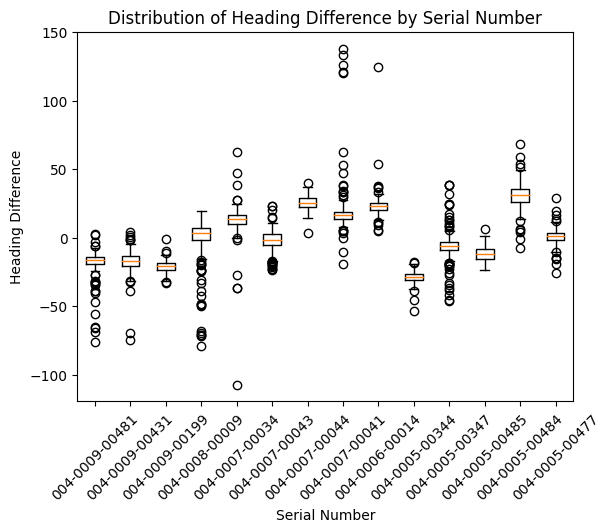

In [7]:
# @title Distribution of Heading Difference by Serial Number

import matplotlib.pyplot as plt

plt.boxplot([merged_data['Heading Difference'][merged_data['Serial Number'] == sn] for sn in merged_data['Serial Number'].unique()], labels=merged_data['Serial Number'].unique())

plt.xlabel('Serial Number')
plt.ylabel('Heading Difference')
plt.title('Distribution of Heading Difference by Serial Number')
_ = plt.xticks(rotation=45)

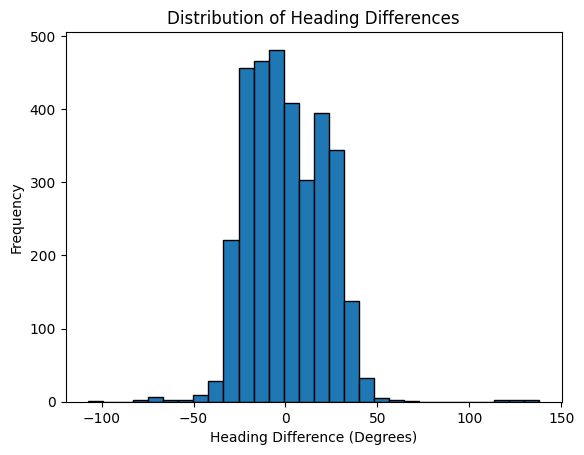

In [8]:
import matplotlib.pyplot as plt

# Plot the distribution of heading differences
plt.hist(merged_data['Heading Difference'], bins=30, edgecolor='black')
plt.xlabel('Heading Difference (Degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Heading Differences')
plt.show()

In [17]:
# Calculate the 3 quantiles (25th, 50th, and 75th percentiles)
quantiles = merged_data['Heading Difference'].quantile([0.25, 0.5, 0.75])

# Calculate the interquartile range (IQR)
IQR = quantiles[0.75] - quantiles[0.25]

# Define the threshold as 1.5 times the IQR above the 75th percentile and below the 25th percentile
lower_threshold = quantiles[0.25] - 1.5 * IQR
upper_threshold = quantiles[0.75] + 1.5 * IQR

# Identify anomalies based on the calculated thresholds
anomalies = merged_data[(merged_data['Heading Difference'] < lower_threshold) |
                        (merged_data['Heading Difference'] > upper_threshold)]

lower_threshold, upper_threshold, anomalies

(-65.66047555000017,
 67.43581845000023,
        Serial Number                NZDT   Latitude   Longitude  GPS Heading  \
 95    004-0009-00481 2020-10-16 17:25:16 -37.554699  175.459136          345   
 96    004-0009-00481 2020-10-16 17:25:14 -37.554699  175.459136          345   
 97    004-0009-00481 2020-10-16 17:25:13 -37.554699  175.459135          345   
 241   004-0009-00431 2020-10-16 16:47:57 -37.553478  175.459150           17   
 244   004-0009-00431 2020-10-16 16:47:54 -37.553483  175.459148          323   
 787   004-0008-00009 2020-10-16 16:03:47 -37.554688  175.459136          351   
 788   004-0008-00009 2020-10-16 16:03:46 -37.554689  175.459136          347   
 933   004-0008-00009 2020-10-16 16:00:46 -37.556512  175.459086          303   
 934   004-0008-00009 2020-10-16 16:00:45 -37.556511  175.459086          303   
 935   004-0008-00009 2020-10-16 16:00:44 -37.556512  175.459086          303   
 936   004-0008-00009 2020-10-16 16:00:43 -37.556513  175.459086    

*3. Analysis and Results*

In [ ]:
# Define a function to calculate the end point of the vector
def calculate_endpoint(lat, lon, heading, distance=0.0001):
    """
    Calculate the endpoint of the vector given a starting point, heading, and distance.
    """
    R = 6371e3  # Earth's radius in meters
    lat1 = np.radians(lat)
    lon1 = np.radians(lon)
    heading = np.radians(heading)

    lat2 = np.arcsin(np.sin(lat1) * np.cos(distance / R) + np.cos(lat1) * np.sin(distance / R) * np.cos(heading))
    lon2 = lon1 + np.arctan2(np.sin(heading) * np.sin(distance / R) * np.cos(lat1), np.cos(distance / R) - np.sin(lat1) * np.sin(lat2))

    return np.degrees(lat2), np.degrees(lon2)

# Calculate the endpoints for each row in the merged data
merged_data['End Latitude'], merged_data['End Longitude'] = zip(*merged_data.apply(
    lambda row: calculate_endpoint(row['Latitude'], row['Longitude'], row['Heading']), axis=1))

# Create a figure
fig = go.Figure()

# Add arrows for each cow's heading
for serial_number, group in merged_data.groupby('Serial Number'):
    fig.add_trace(go.Scattermapbox(
        mode='markers+lines',
        lon=np.concatenate([group['Longitude'].values, group['End Longitude'].values]),
        lat=np.concatenate([group['Latitude'].values, group['End Latitude'].values]),
        marker={'size': 10},
        line=dict(width=2),
        name=serial_number,
        text=group['NZDT'].astype(str)  # Adding timestamp as hover text
    ))

# Update layout for the map
fig.update_layout(
    title='Movement Tracks of Each Cow with Heading Vectors',
    mapbox=dict(
        style='open-street-map',
        zoom=15,
        center=dict(lat=merged_data['Latitude'].mean(), lon=merged_data['Longitude'].mean())
    ),
    showlegend=True
)

# Show the figure
fig.show()

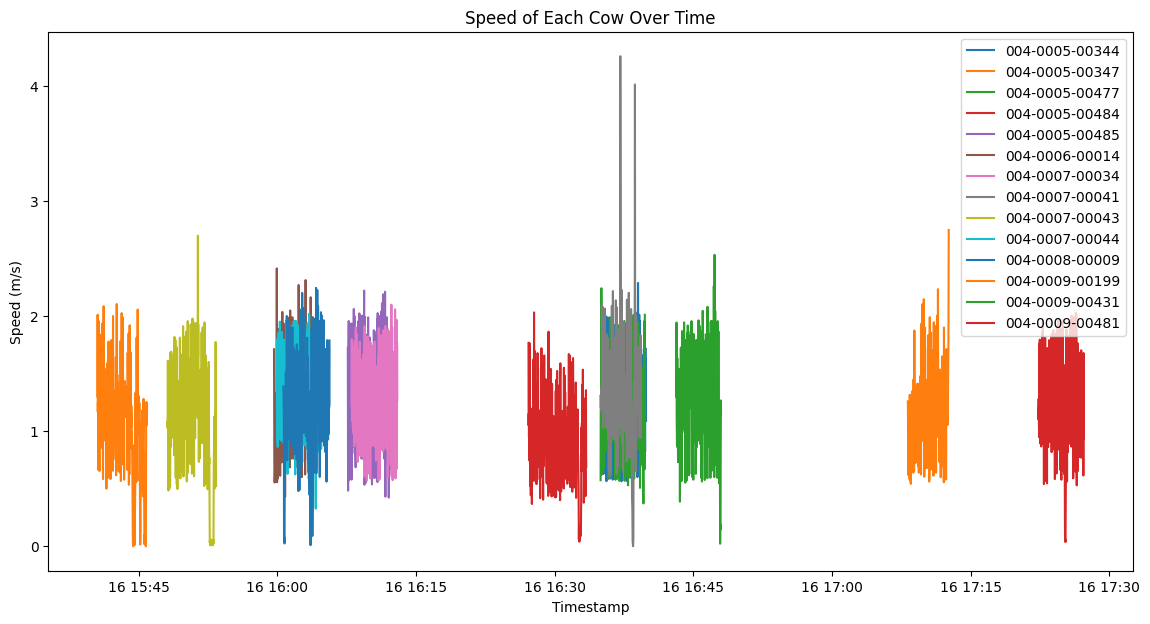

In [13]:
import matplotlib.pyplot as plt

# Plot the speed of each cow over time
fig, ax = plt.subplots(figsize=(14, 7))

for serial_number, group in merged_data.groupby('Serial Number'):
    ax.plot(group['NZDT'], group['GPS Speed'], label=serial_number)

ax.set_title('Speed of Each Cow Over Time')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Speed (m/s)')
ax.legend()

plt.show()